**Question 1:** Simulate and calculate expected utility and the average realised utility for $K=10000$ draws, for each career choice $j$.


- We simulates the utility of different career choices with variability introduced by random noise. We hereafter import NumPy for numerical operations, then define utility values for three careers, set the number of simulations to 10,000, and specify a noise standard deviation of 2. We generate random noise for each career and simulation, add this noise to the utility values, and calculate the resulting utilities. Finally, we compute and print the expected and average realized utilities across all simulations.

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from types import SimpleNamespace

# Constants
v = [1, 2, 3]  # Values for each career
K = 10000  # Number of simulations
sigma = 2  # Standard deviation of the noise

# Generate random noise for each career and simulation
epsilon = np.random.normal(0, sigma, (K, len(v)))

# Calculate utility for each simulation and career
utilities = v + epsilon

# Calculate expected utility (mean across simulations) and average realized utility
expected_utility = np.mean(utilities, axis=0)
average_realized_utility = np.mean(utilities, axis=0)


print(f'The expected utility is: {expected_utility}')

print(f'The average realized utility is: {average_realized_utility}')

The expected utility is: [0.97905054 2.00234836 3.03332737]
The average realized utility is: [0.97905054 2.00234836 3.03332737]


**Interpretation**: The average realized utilities are the same as the expected utilities since the noise 
$\epsilon$ averages out to zero across many draws. Each value aligns closely with the corresponding constant 
$v_j$ for each career due to the law of large numbers, showing that the noise contributes little to the long-term average.

**Question 2:** Simulate and visualize: For each type of graduate, $i$, the share of graduates choosing each career, the average subjective expected utility of the graduates, and the average ex post realized utility given their choice. <br>


- This code simulates career choices and utilities for a group of graduates, introducing variability with random noise. We begin by defining the number of careers (J = 3), the number of graduates (N = 10), the number of simulations (K = 10,000), the noise standard deviation (sigma = 2), and the intrinsic utilities for each career (v = 1, 2, 3). We then create arrays to store the results of career choices, expected utilities, and realized utilities for each graduate.

- In the simulation loop, for each graduate, we determine the number of friends, Fi, and generate utility values for each career by adding noise to the intrinsic utilities. We identify the career chosen most frequently across simulations, record the share of graduates choosing each career, calculate the expected utility for each graduate, and compute the realized utility based on the chosen careers

- Finally, we plot the share of each career choice by graduate, the average expected utility for each graduate, and the average realized utility for each graduate. This provides a detailed simulation of career choice dynamics and visualizes the results to highlight the patterns in expected and realized utilities.

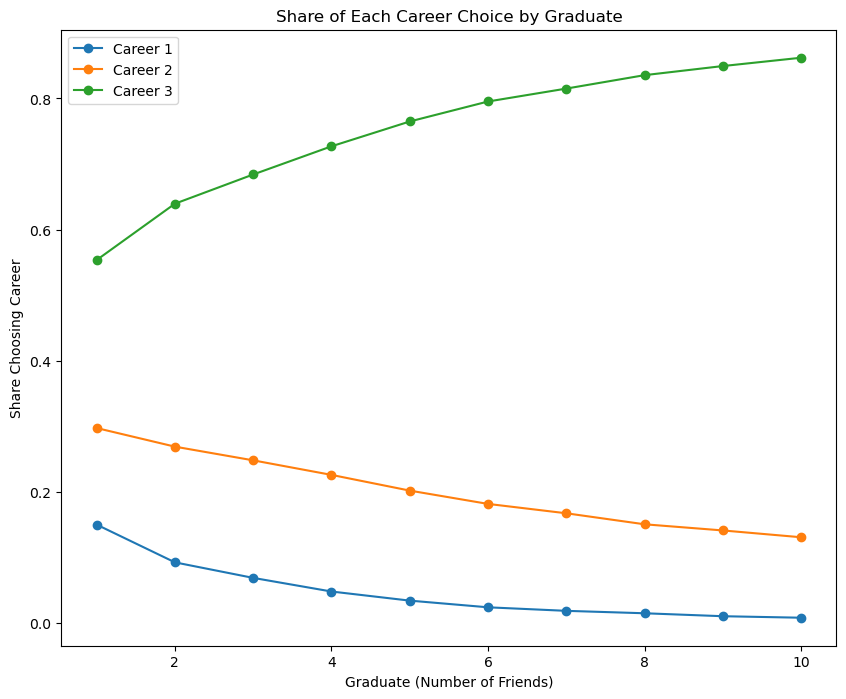

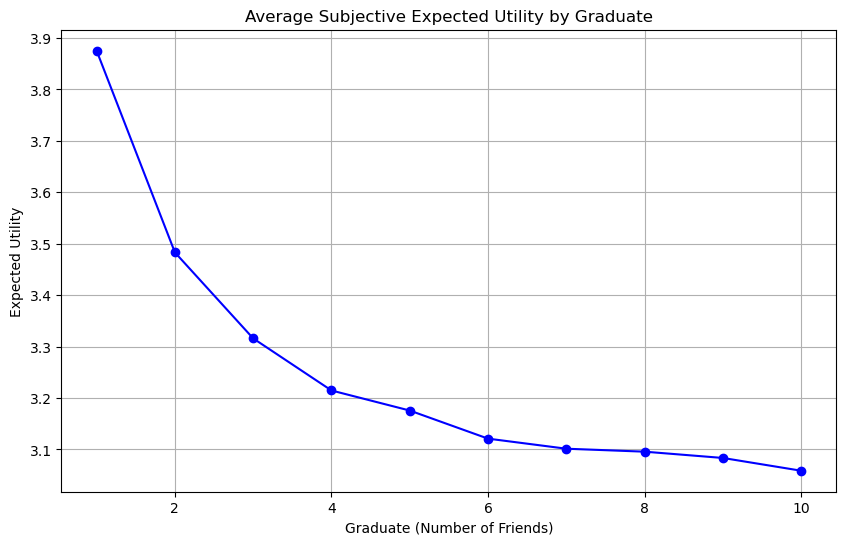

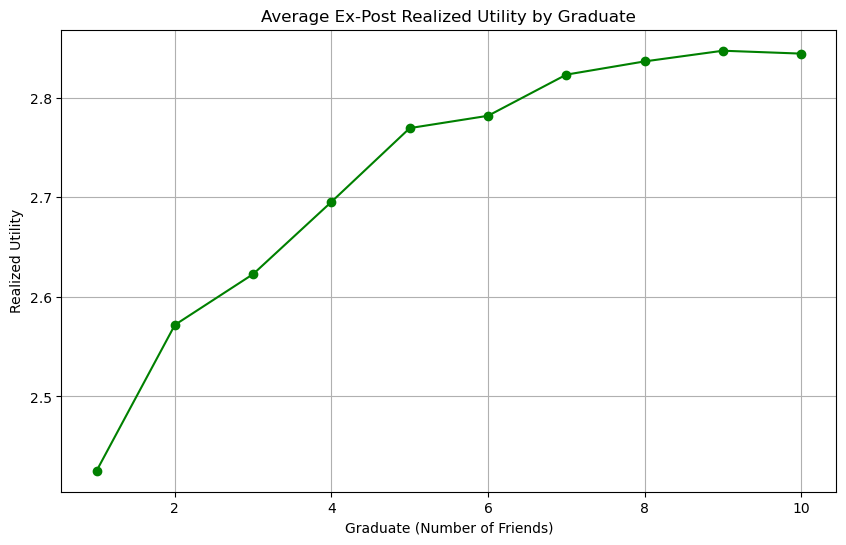

In [6]:

from career_simulation import CareerSimulation

# Create an instance of the CareerSimulation class
sim = CareerSimulation()

# Run the simulation
sim.simulate()

# Plotting the results
sim.plot_results()

**Interpretation**: Career 3 (green line) is the most popular, with its share increasing as the number of friends increases. Conversely, Career 1 (blue line) and Career 2 (orange line) show a decreasing trend in their shares as the number of friends grows, with Career 1 being the least chosen overall. This indicates a strong preference for Career 3 among graduates with more friends.

The second graph shows a decreasing trend in the average subjective expected utility as the number of friends increases, an increasing trend in average ex-post realized utility with the number of friends, peaking around 8 friends before slightly decreasing.

**Question 3:** Following the same approach as in question 2, find the new optimal career choice for each $i$, $k$. Then for each $i$, calculate the average subjective expected utility from their new optimal career choice, and the ex post realized utility of that career. Also, for each $i$, calculate the share of graduates that chooses to switch careers, conditional on which career they chose in the first year. <br>

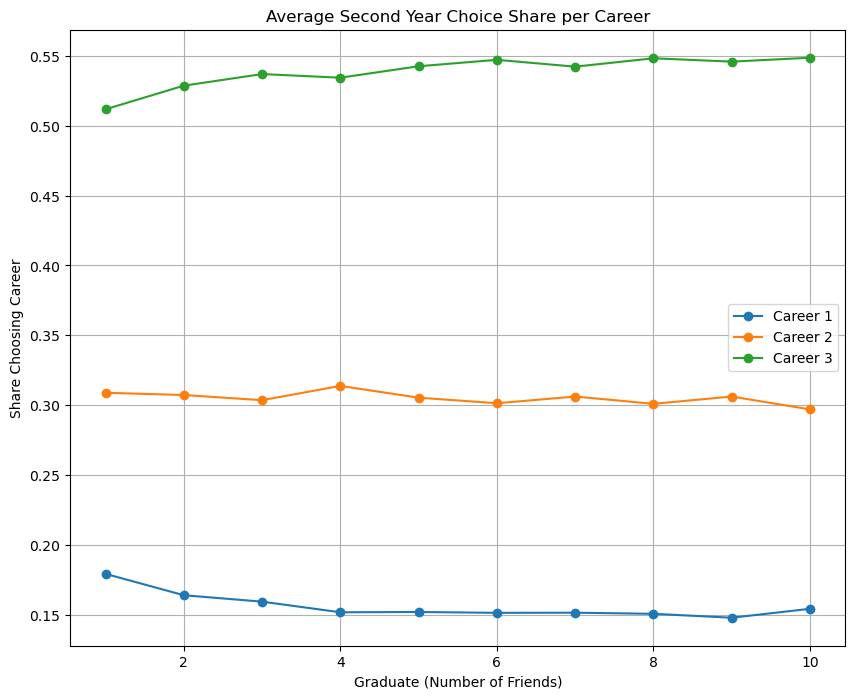

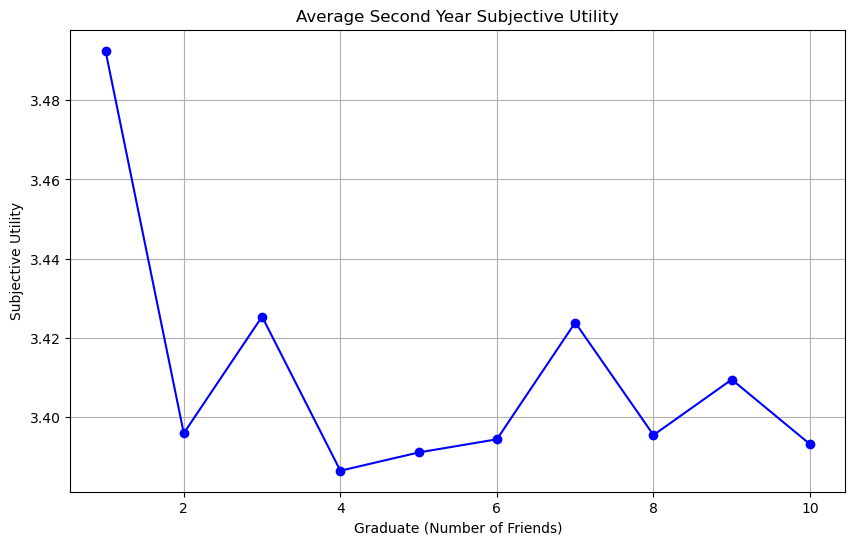

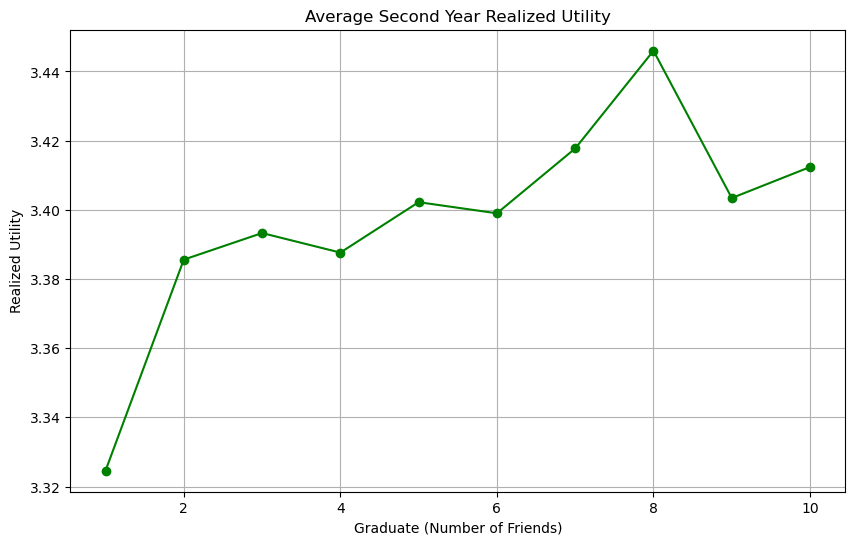

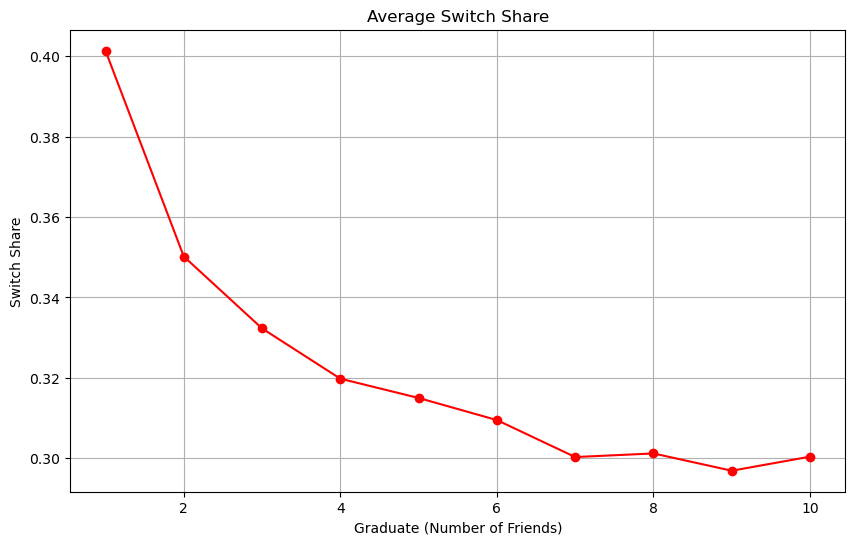

In [15]:

from career_choice_simulation import CareerChoiceSimulation

# Create an instance of the CareerSimulation class
sim = CareerChoiceSimulation()

# Run the first year simulation
sim.run_simulation()

# Run the second year simulation
sim.run_second_year_simulation()

# Plotting the results
sim.plot_results()




**Interpretation**: The first three grpahs shows the same overall trend as in question 1. The last graph shows a general decline in the average switch share as the graduate number increases.


- We are hereafter using NumPy and Matplotlib to create a figure with subplots for each graduate, displaying conditional switching shares based on their initial career choice. The code calculates and normalizes the switching shares, then visualizes the results with heatmaps and annotations for each graduate.

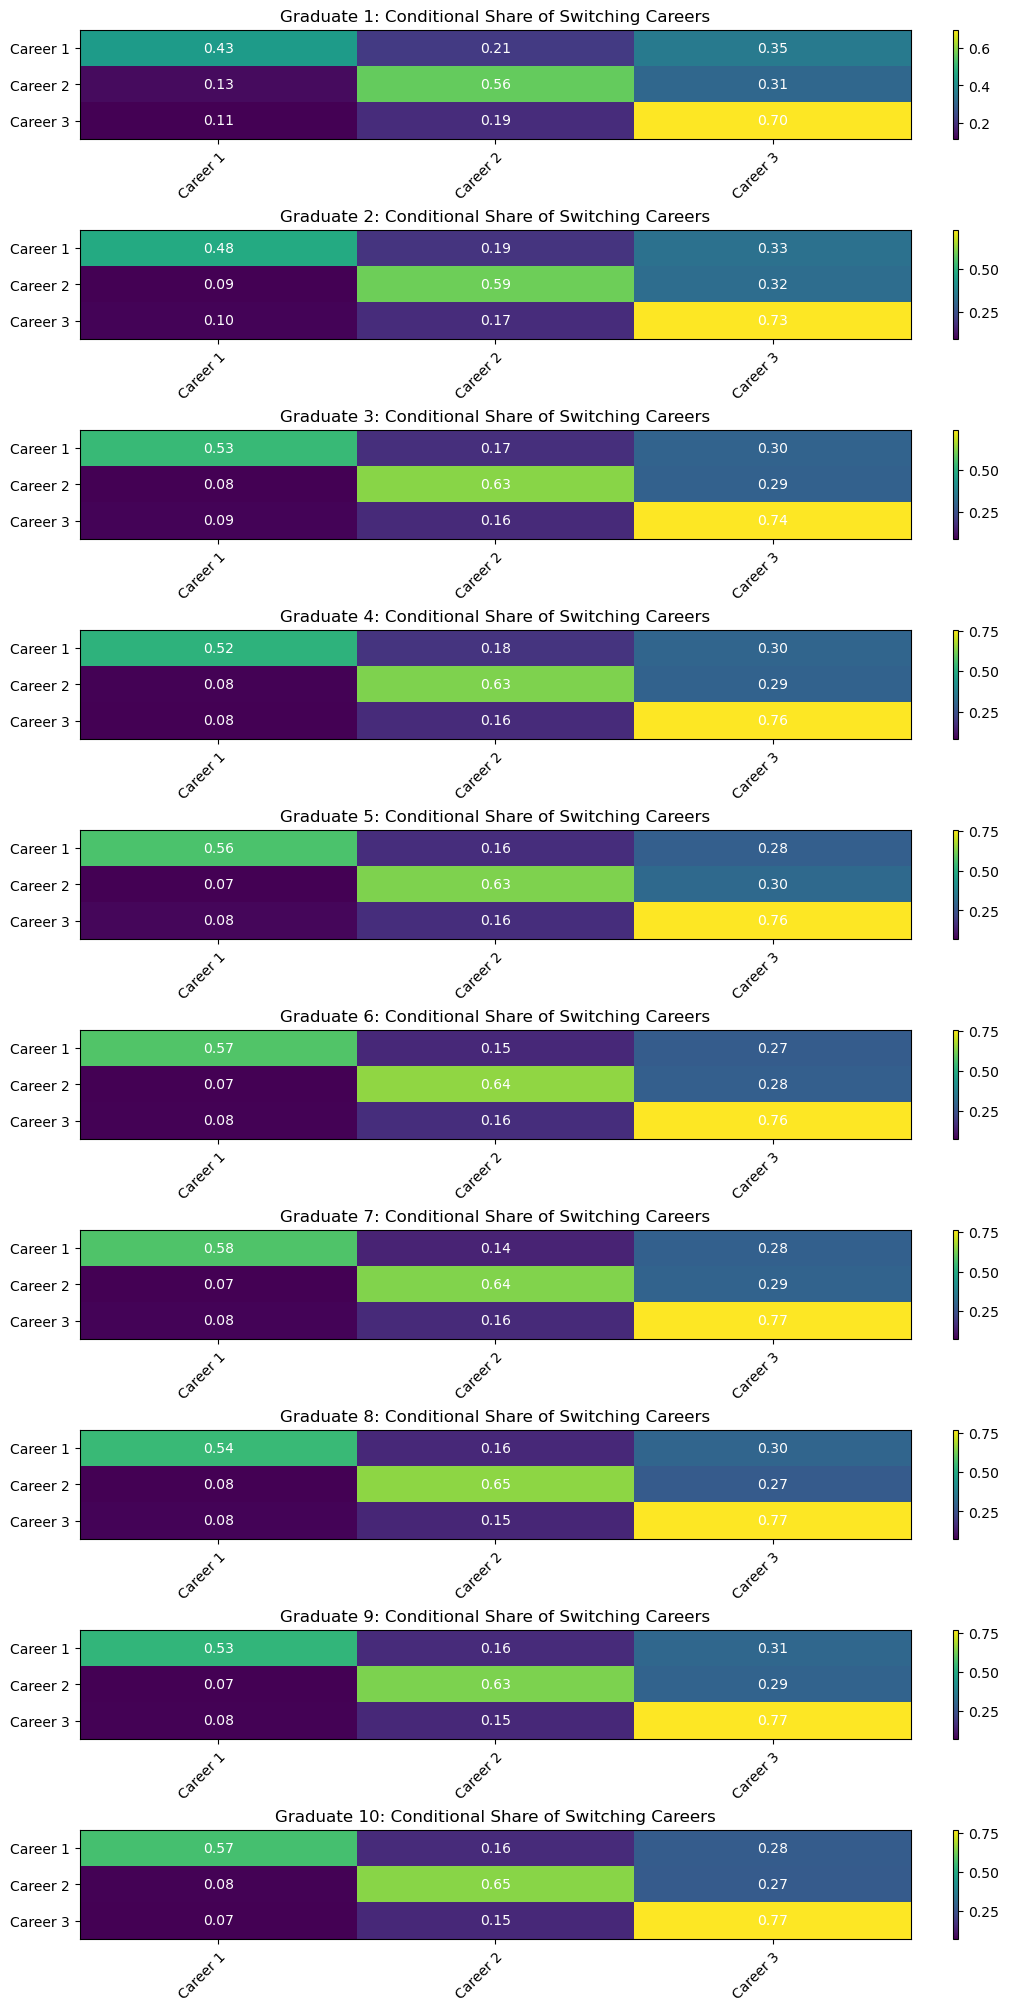

In [16]:

# Create a figure with subplots for each graduate
fig, axs = plt.subplots(nrows=par.N, figsize=(10, 2 * par.N), constrained_layout=True)

# Loop through each graduate to calculate and plot their conditional switching shares
for i in range(par.N):
    switch_shares_conditional_i = np.zeros((par.J, par.J))  # Initialize the matrix for this graduate
    total_initial_i = np.zeros(par.J)  # Total grads who chose each career initially

    # Count the initial choices and switches for graduate i
    for j_initial in range(par.J):
        initial_mask_i = choices[i, j_initial, :] == 1  # Initial choices of graduate i for career j_initial
        total_initial_i[j_initial] = initial_mask_i.sum()  # Total number of times i chose j_initial
        for j_second in range(par.J):
            switches_to_second_i = (second_year_choices[i, j_second, :] == 1) & initial_mask_i
            switch_shares_conditional_i[j_initial, j_second] = switches_to_second_i.sum()  # Count switches

    # Normalize the counts to get probabilities
    for j_initial in range(par.J):
        if total_initial_i[j_initial] > 0:
            switch_shares_conditional_i[j_initial, :] /= total_initial_i[j_initial]

    # Plot for this graduate
    ax = axs[i] if par.N > 1 else axs
    im = ax.imshow(switch_shares_conditional_i, cmap='viridis', interpolation='none', aspect='auto')
    ax.set_xticks(np.arange(par.J))
    ax.set_yticks(np.arange(par.J))
    ax.set_xticklabels([f"Career {j+1}" for j in range(par.J)])
    ax.set_yticklabels([f"Career {j+1}" for j in range(par.J)])
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

    # Add text annotations
    for j_initial in range(par.J):
        for j_second in range(par.J):
            ax.text(j_second, j_initial, f"{switch_shares_conditional_i[j_initial, j_second]:.2f}",
                    ha="center", va="center", color="w")

    ax.set_title(f"Graduate {i+1}: Conditional Share of Switching Careers")
    fig.colorbar(im, ax=ax)

plt.show()

OBS: First year choice in on the x-axis, and second year choices in the y-axis

**Interpretation**: Retention Tendency: All careers show a tendency for graduates to stay rather than switch, with Career 3 having the highest retention rate. This suggests that graduates might be highly satisfied with Career 3 or find it more advantageous compared to the others.

Switching Dynamics: The switching behavior indicates that Careers 2 and 3 are more attractive alternatives than Career 1, given the relatively higher percentages of switches to these careers from Career 1.
